In [1]:
import datetime
from datetime import date
import functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/combineddata.csv")
df = functions.filter(df)
df = functions.clean(df)
df = functions.group_west_east(df)
df = functions.group_dates_seasons(df)
df_categorical, df_numerical = functions.separate_cat_num(df)

In [3]:
df.head(5)

,station,train_name,final_destination_station,delay_in_min,time,is_canceled,train_type,train_line_ride_id,former,year,month,day,season
0,Aachen Hbf,RE 9,Aachen Hbf,0,2024-07-01 00:41:00,False,RE,-1701587498056121817-2406302210,West,2024,7,1,Summer
1,Aachen Hbf,RB 20,Aachen-Rothe Erde,3,2024-07-01 00:04:00,False,RB,1573967790757085557-2406302312,West,2024,7,1,Summer
2,Aachen Hbf,RE 1,Aachen Hbf,12,2024-07-01 00:19:00,False,RE,7157250219775883918-2406302120,West,2024,7,1,Summer
3,Aachen Hbf,RB 33,Aachen Hbf,2,2024-07-01 00:29:00,False,RB,3877311608492123870-2406302216,West,2024,7,1,Summer
4,Aachen Hbf,RE 18,Heerlen,1,2024-07-01 00:18:00,False,RE,349781417030375472-2407010017,West,2024,7,1,Summer


In [4]:
df.shape

(10458477, 13)

# Univariate Analysis

## Categorical Variables

In [5]:
df_categorical.columns

Index(['station', 'train_name', 'final_destination_station', 'time',
       'train_type', 'train_line_ride_id', 'former', 'season', 'year', 'month',
       'day'],
      dtype='object')

In [6]:
station_frequency = df["station"].value_counts()
station_proportion = df["station"].value_counts(normalize=True)

station_frequency, station_proportion

(station
 Köln Hbf                         284862
 München Hbf                      280155
 Frankfurt(Main)Hbf               279623
 Nürnberg Hbf                     271389
 Berlin Hbf                       269406
                                   ...  
 Plochingen                        16017
 Heilbronn Hbf                     15979
 Ludwigshafen(Rh)Hbf               11278
 Wiesbaden Hbf                     11035
 Düsseldorf Flughafen Terminal       128
 Name: count, Length: 110, dtype: int64,
 station
 Köln Hbf                         0.027237
 München Hbf                      0.026787
 Frankfurt(Main)Hbf               0.026736
 Nürnberg Hbf                     0.025949
 Berlin Hbf                       0.025760
                                    ...   
 Plochingen                       0.001531
 Heilbronn Hbf                    0.001528
 Ludwigshafen(Rh)Hbf              0.001078
 Wiesbaden Hbf                    0.001055
 Düsseldorf Flughafen Terminal    0.000012
 Name: proportion

In [7]:
station_frequency[:30]

station
Köln Hbf               284862
München Hbf            280155
Frankfurt(Main)Hbf     279623
Nürnberg Hbf           271389
Berlin Hbf             269406
Dortmund Hbf           246484
Köln Messe/Deutz       234013
Münster(Westf)Hbf      208669
Erfurt Hbf             200547
Hamburg Hbf            190802
Duisburg Hbf           179007
Karlsruhe Hbf          165906
Leipzig Hbf            165571
Düsseldorf Hbf         164491
Würzburg Hbf           164218
Stuttgart Hbf          159537
Berlin-Spandau         156971
München-Pasing         153155
Essen Hbf              148723
Koblenz Hbf            146931
Hamm(Westf)Hbf         142950
Augsburg Hbf           139802
Saarbrücken Hbf        138941
Aachen Hbf             138553
Kassel-Wilhelmshöhe    136691
Berlin Ostbahnhof      131944
Berlin Südkreuz        125506
Magdeburg Hbf          123487
Ulm Hbf                122735
Hannover Hbf           119974
Name: count, dtype: int64

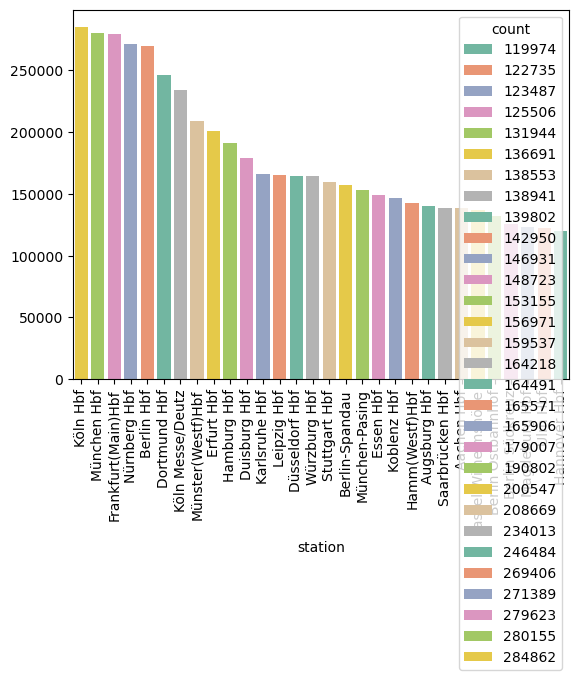

In [35]:
sns.barplot(x=station_frequency[:30].index, y=station_frequency[:30].values , palette="Set2", hue=station_frequency[:30])
plt.xticks(rotation=90)
plt.show();

In [9]:
train_name_frequency = df["train_name"].value_counts()
train_name_proportion = df["train_name"].value_counts(normalize=True)

train_name_frequency, train_name_proportion

(train_name
 RE 1         679982
 RE 7         369380
 RE 8         312767
 RE 2         296854
 RE 3         282062
               ...  
 ICE 2325          1
 ICE 55910         1
 ICE 55915         1
 RE DLr            1
 ICE 2864          1
 Name: count, Length: 1682, dtype: int64,
 train_name
 RE 1         6.501731e-02
 RE 7         3.531872e-02
 RE 8         2.990560e-02
 RE 2         2.838406e-02
 RE 3         2.696970e-02
                  ...     
 ICE 2325     9.561622e-08
 ICE 55910    9.561622e-08
 ICE 55915    9.561622e-08
 RE DLr       9.561622e-08
 ICE 2864     9.561622e-08
 Name: proportion, Length: 1682, dtype: float64)

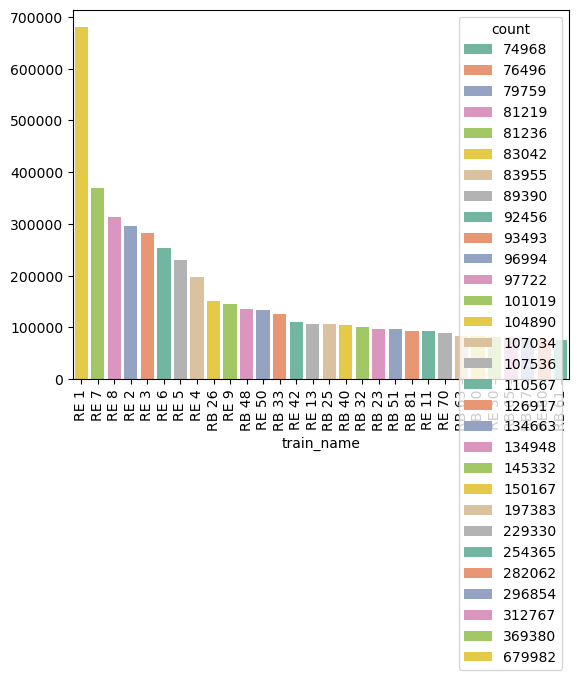

In [36]:
sns.barplot(x=train_name_frequency[:30].index, y=train_name_frequency[:30].values , palette="Set2", hue=train_name_frequency[:30])
plt.xticks(rotation=90)
plt.show();

In [11]:
train_type_frequency = df["train_type"].value_counts()
train_type_proportion = df["train_type"].value_counts(normalize=True)

train_type_frequency, train_type_proportion

(train_type
 RE     4588733
 RB     3432355
 ICE    1948348
 IC      430272
 IRE      58769
 Name: count, dtype: int64,
 train_type
 RE     0.438757
 RB     0.328189
 ICE    0.186294
 IC     0.041141
 IRE    0.005619
 Name: proportion, dtype: float64)

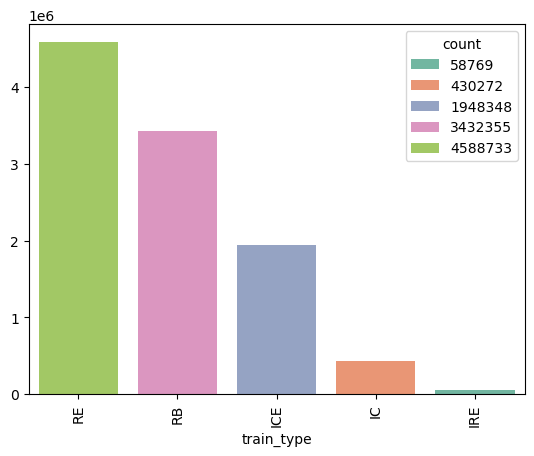

In [30]:
sns.barplot(x=train_type_frequency.index, y=train_type_frequency.values , palette="Set2", hue=train_type_frequency)
plt.xticks(rotation=90)
plt.show();

In [13]:
former_frequency = df["former"].value_counts()
former_proportion = df["former"].value_counts(normalize=True)

former_frequency, former_proportion

(former
 West    7912643
 East    2545834
 Name: count, dtype: int64,
 former
 West    0.756577
 East    0.243423
 Name: proportion, dtype: float64)

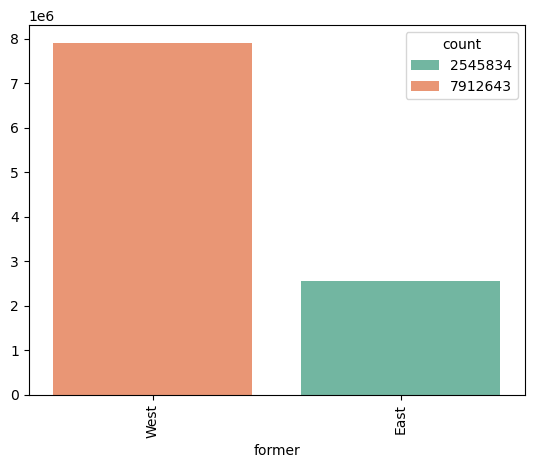

In [29]:
sns.barplot(x=former_frequency.index, y=former_frequency.values , palette="Set2", hue=former_frequency)
plt.xticks(rotation=90)
plt.show();

In [15]:
season_frequency = df["season"].value_counts()
season_proportion = df["season"].value_counts(normalize=True)

season_frequency, season_proportion

(season
 Summer    3234311
 Winter    2426123
 Autumn    2404412
 Spring    2393631
 Name: count, dtype: int64,
 season
 Summer    0.309253
 Winter    0.231977
 Autumn    0.229901
 Spring    0.228870
 Name: proportion, dtype: float64)

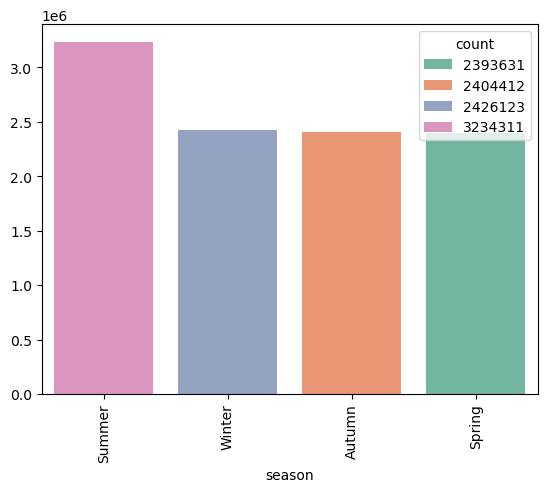

In [28]:
sns.barplot(x=season_frequency.index, y=season_frequency.values , palette="Set2", hue=season_frequency)
plt.xticks(rotation=90)
plt.show();

In [17]:
year_frequency = df["year"].value_counts()
year_proportion = df["year"].value_counts(normalize=True)

year_frequency, year_proportion

(year
 2025    5567639
 2024    4890838
 Name: count, dtype: int64,
 year
 2025    0.532357
 2024    0.467643
 Name: proportion, dtype: float64)

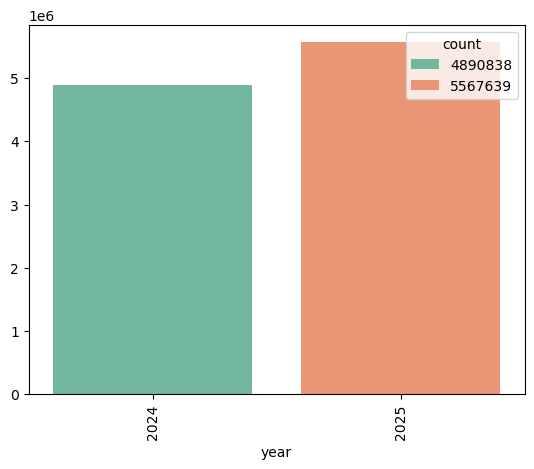

In [26]:
sns.barplot(x=year_frequency.index, y=year_frequency.values , palette="Set2", hue=year_frequency)
plt.xticks(rotation=90)
plt.show();

# Numerical variables

In [37]:
df.columns

Index(['station', 'train_name', 'final_destination_station', 'delay_in_min',
       'time', 'is_canceled', 'train_type', 'train_line_ride_id', 'former',
       'year', 'month', 'day', 'season'],
      dtype='object')

## All trains

In [106]:
# All trains
df_numerical.describe().round(2)

,delay_in_min
count,10458477.00
mean,5.34
std,12.31
min,-1418.00
25%,0.00
50%,1.00
75%,5.00
max,843.00


In [107]:
df["delay_in_min"].mode()

0    0
Name: delay_in_min, dtype: int64

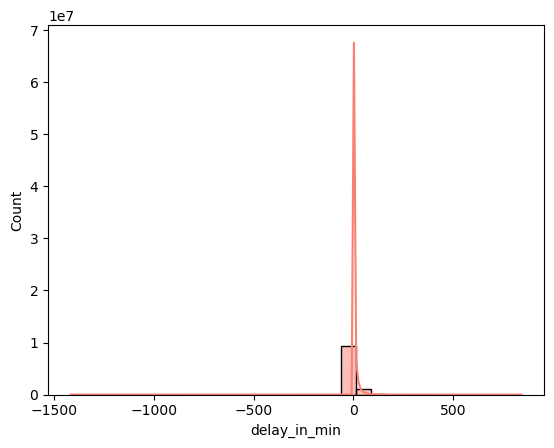

In [117]:
sns.histplot(df["delay_in_min"], kde=True, bins=30, color="salmon")
plt.show();

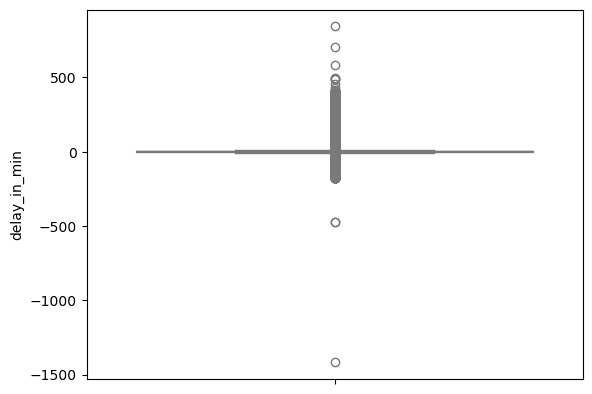

In [118]:
sns.boxplot(data = df["delay_in_min"], color="lightblue")
plt.show();

## Late trains

Only those trains that were late (more than 5 minutes delay)

In [114]:
df_late = df[df["delay_in_min"] > 5]
df_late["delay_in_min"].describe().round(2)

count    2458700.00
mean          19.15
std           19.58
min            6.00
25%            8.00
50%           12.00
75%           22.00
max          843.00
Name: delay_in_min, dtype: float64

In [109]:
df_late["delay_in_min"].mode()

0    6
Name: delay_in_min, dtype: int64

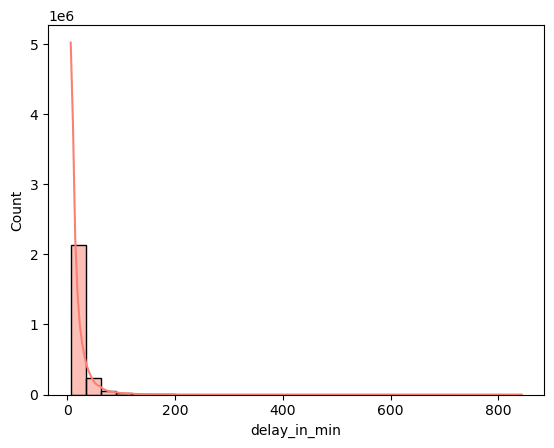

In [115]:
sns.histplot(df_late["delay_in_min"], kde=True, bins=30, color="salmon")
plt.show();

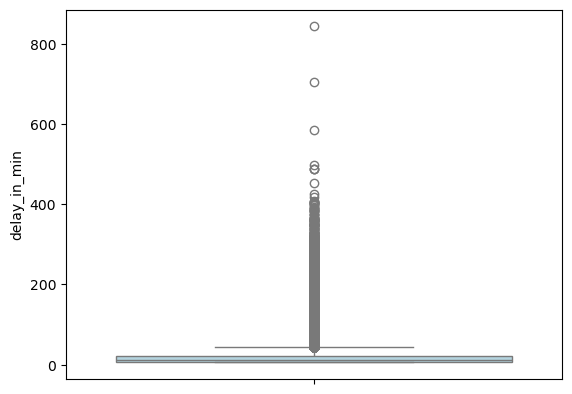

In [116]:
sns.boxplot(data = df_late["delay_in_min"], color="lightblue")
plt.show();

In [136]:
# Calculate late trains outliers
Uw = 22 + (1.5 * (22 - 8))
df_late_nooutliers = df_late[df_late["delay_in_min"] < Uw]
df_late_onlyoutliers = df_late[df_late["delay_in_min"] >= Uw]

In [137]:
# Outliers stats
df_late_onlyoutliers["delay_in_min"].describe().round(2)

count    210854.00
mean         68.80
std          31.01
min          43.00
25%          49.00
50%          59.00
75%          77.00
max         843.00
Name: delay_in_min, dtype: float64

In [138]:
# Outliers stats
df_late_nooutliers["delay_in_min"].describe().round(2)

count    2247846.00
mean          14.50
std            8.74
min            6.00
25%            8.00
50%           11.00
75%           19.00
max           42.00
Name: delay_in_min, dtype: float64

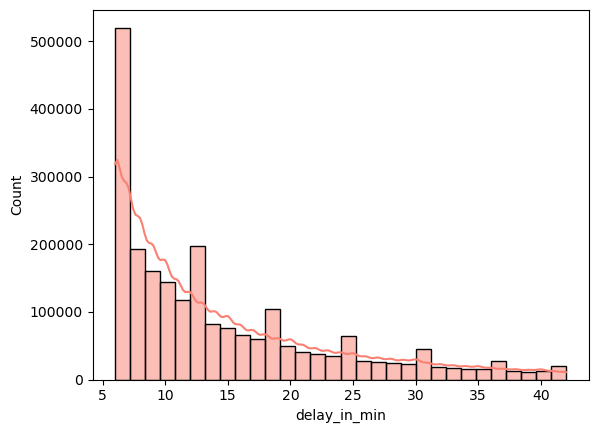

In [139]:
sns.histplot(df_late_nooutliers["delay_in_min"], kde=True, bins=30, color="salmon")
plt.show();

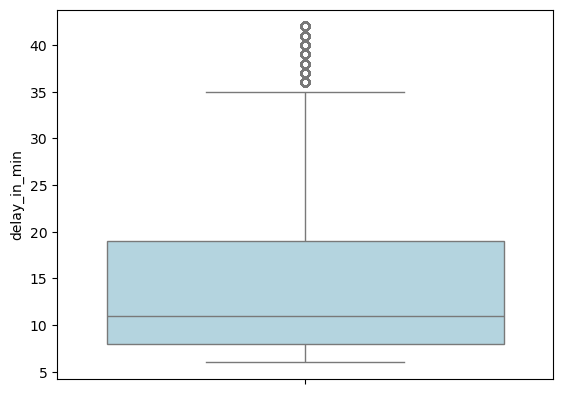

In [140]:
sns.boxplot(data = df_late_nooutliers["delay_in_min"], color="lightblue")
plt.show();

## Early trains

Only those trains that were early (less than 0 minutes delay)

In [110]:
df_early = df[df["delay_in_min"] < 0]
df_early["delay_in_min"].describe().round(2)

count    321486.00
mean         -1.87
std           4.92
min       -1418.00
25%          -2.00
50%          -1.00
75%          -1.00
max          -1.00
Name: delay_in_min, dtype: float64

In [111]:
df_early["delay_in_min"].mode()

0   -1
Name: delay_in_min, dtype: int64

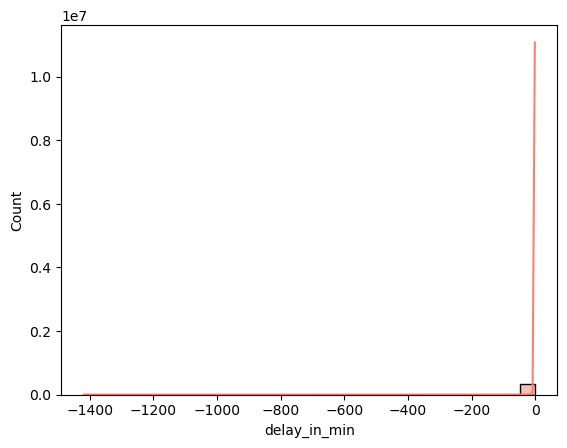

In [120]:
sns.histplot(df_early["delay_in_min"], kde=True, bins=30, color="salmon")
plt.show();

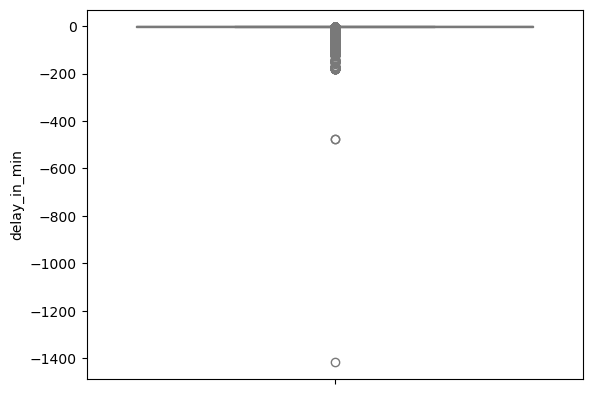

In [119]:
sns.boxplot(data = df_early["delay_in_min"], color="lightblue")
plt.show();

## Trains on time

Only those trains that were on time (equal or more than 0 and less than 6 minutes delay)

In [123]:
df_ontime = df[(df["delay_in_min"] >= 0) & (df["delay_in_min"] < 6)]
df_ontime["delay_in_min"].describe().round(2)

count    7678291.00
mean           1.21
std            1.48
min            0.00
25%            0.00
50%            1.00
75%            2.00
max            5.00
Name: delay_in_min, dtype: float64

In [104]:
df_ontime["delay_in_min"].mode()

0    0
Name: delay_in_min, dtype: int64

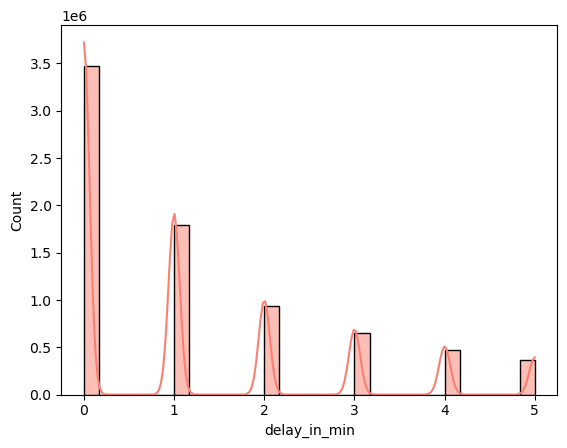

In [121]:
sns.histplot(df_ontime["delay_in_min"], kde=True, bins=30, color="salmon")
plt.show();

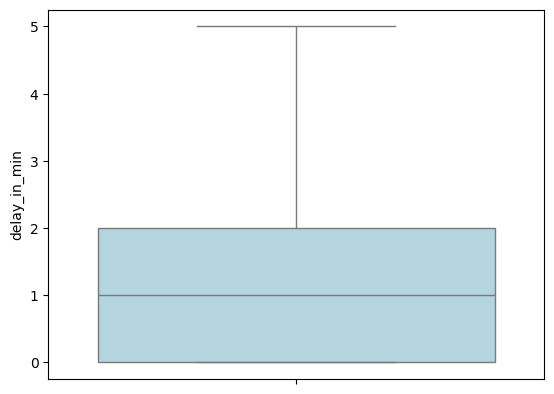

In [122]:
sns.boxplot(data = df_ontime["delay_in_min"], color="lightblue")
plt.show();